In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc

# Reading and Exploring the Dataset

In [14]:
#fetch dataset
mushroom = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 

mushroom_df = pd.DataFrame()
mushroom_df = pd.concat([X,y],axis=1)

In [15]:
mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [16]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [17]:
mushroom_df = mushroom_df.astype({col: 'category' for col in mushroom_df.select_dtypes(include='object').columns})
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [18]:
mushroom_df = mushroom_df.drop(['stalk-root'],axis=1)

In [19]:
mushroom_df['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

# Preprocessing

In [20]:
encoded_mushroom_df = pd.DataFrame()
label_encoder_map = {}
for col in mushroom_df.columns:
    le = LabelEncoder()
    encoded_mushroom_df[col] = le.fit_transform(mushroom_df[col])
    label_encoder_map[col] = le

In [21]:
encoded_mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [22]:
encoded_mushroom_df['poisonous'].value_counts()

poisonous
0    4208
1    3916
Name: count, dtype: int64

In [23]:
X = encoded_mushroom_df.drop(['poisonous'],axis=1)
Y = encoded_mushroom_df['poisonous']
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.3,random_state=4)

In [24]:
np.unique(test_Y,return_counts=True)

(array([0, 1]), array([1268, 1170]))

# Building and Evaluating the Model

In [25]:
model_lr = LogisticRegression(penalty='l2',solver='newton-cholesky',max_iter=200,random_state=42)
model_lr.fit(train_X,train_Y)

LogisticRegression(max_iter=200, random_state=42, solver='newton-cholesky')

In [26]:
def custom_test(threshold):
    test_custom_pred_Y = (test_prob_pred_Y>=threshold).astype(int)
    return test_custom_pred_Y

In [28]:
train_prob_pred_Y = model_lr.predict_proba(train_X)[:,1]
test_prob_pred_Y = model_lr.predict_proba(test_X)[:,1]

def custom_model_per_threshold(threshold):
    test_pred_Y = custom_test(threshold)
    print(f"Accuracy on testing set for {threshold} threshold: {round(accuracy_score(test_Y,test_pred_Y),2)}")

    conf_matrix = confusion_matrix(test_Y, test_pred_Y)
    fig,ax = plt.subplots(figsize=(5,5))
    displ = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    displ.plot(cmap=plt.cm.PuBu,ax=ax)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")
    plt.show()
    print(classification_report(test_Y, test_pred_Y))

Accuracy on testing set for 0.5 threshold: 0.94


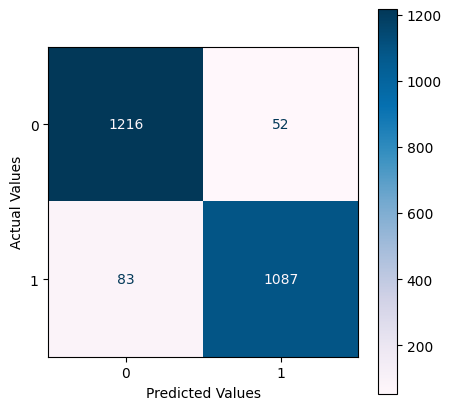

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1268
           1       0.95      0.93      0.94      1170

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [16]:
custom_model_per_threshold(0.5)

Accuracy on testing set for 0.4 threshold: 0.95


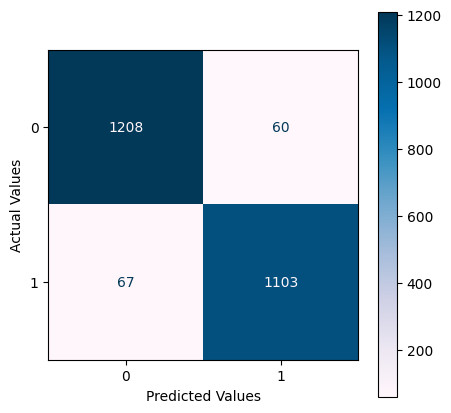

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1268
           1       0.95      0.94      0.95      1170

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [17]:
custom_model_per_threshold(0.4)

Accuracy on testing set for 0.3 threshold: 0.94


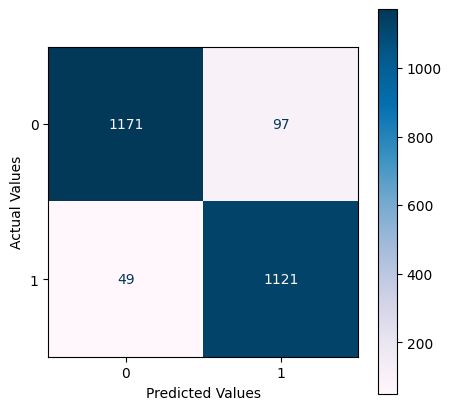

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1268
           1       0.92      0.96      0.94      1170

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [18]:
custom_model_per_threshold(0.3)

Accuracy on testing set for 0.2 threshold: 0.93


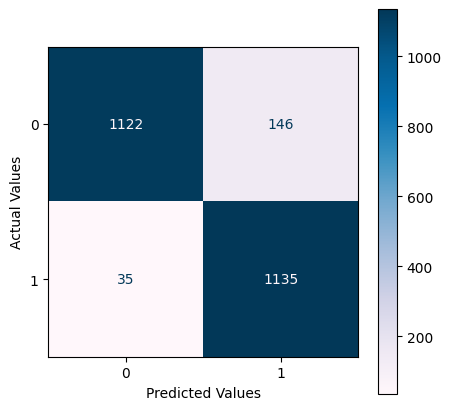

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      1268
           1       0.89      0.97      0.93      1170

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [19]:
custom_model_per_threshold(0.2)

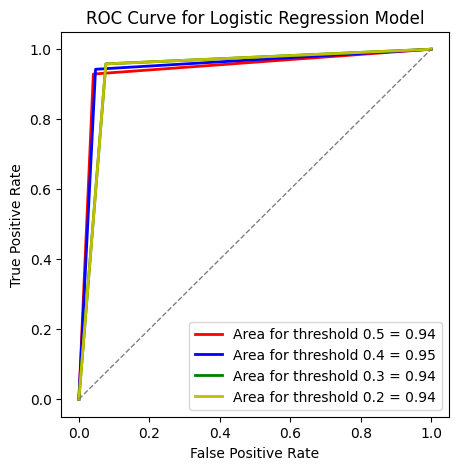

In [20]:
test_pred_Y1 = custom_test(0.5)
fpr1,tpr1,threshold1 = roc_curve(test_Y,test_pred_Y1)
roc_auc1 = auc(fpr1,tpr1)

test_pred_Y2 = custom_test(0.4)
fpr2,tpr2,threshold2 = roc_curve(test_Y,test_pred_Y2)
roc_auc2 = auc(fpr2,tpr2)

test_pred_Y3 = custom_test(0.3)
fpr3,tpr3,threshold3 = roc_curve(test_Y,test_pred_Y3)
roc_auc3 = auc(fpr3,tpr3)

test_pred_Y4 = custom_test(0.3)
fpr4,tpr4,threshold4 = roc_curve(test_Y,test_pred_Y4)
roc_auc4 = auc(fpr4,tpr4)

plt.figure(figsize=[5,5])
plt.plot(fpr1,tpr1,lw=2,color='r',label=f'Area for threshold 0.5 = {round(roc_auc1,2)}')
plt.plot(fpr2,tpr2,lw=2,color='b',label=f'Area for threshold 0.4 = {round(roc_auc2,2)}')
plt.plot(fpr3,tpr3,lw=2,color='g',label=f'Area for threshold 0.3 = {round(roc_auc3,2)}')
plt.plot(fpr4,tpr4,lw=2,color='y',label=f'Area for threshold 0.2 = {round(roc_auc4,2)}')

plt.plot([0,1],[0,1],lw=1,color='gray',linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [30]:
model_lr.predict_proba(train_X)

array([[9.32036662e-01, 6.79633380e-02],
       [8.92595163e-01, 1.07404837e-01],
       [9.99927221e-01, 7.27794656e-05],
       ...,
       [9.99921913e-01, 7.80872274e-05],
       [9.79717765e-01, 2.02822350e-02],
       [9.68017648e-01, 3.19823524e-02]], shape=(5686, 2))